In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns
import sympy as sy
np.random.seed(10)
x = sy.Symbol('x')

Nama: Evan Aprillio B  
Batch: RMT 18

Latar Belakang  
Saya sebagai murid FTDS Hacktiv8 ingin mengetahui bidang pekerjaan apa saja yang ada di dalam ruang lingku data science, dan pekerjaan apa yang paling di hargai oleh perusahaan-perusahaan 

# Problem Statement

1. berapa rata-rata gaji data analyst tahun 2022 dunia 
2. di negara mana gaji data analyst paling tinggi 
3. di negara itu job title yang memiliki rata-rata gaji paling tinggi dan berapa? 
4. apakah company size memiliki korelasi dengan besaran gaji? 
5. apakah remote ratio berpengaruh terhadap gaji?
6. berapa pertambahan gaji data analyst di negara tersebut dari tahun 2020 dan 2022?
7. prediksi avg gaji ds di tahun 2023


In [2]:
#mengimport data dan menampilkan 5 data teratas
df=pd.read_csv("ds_salaries.csv")
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
#mengganti kolom company size agar lebih mudah dibaca
df["company_size"] = df["company_size"].replace("L", "Large Company")
df["company_size"] = df["company_size"].replace("M", "Mid Sized Company")
df["company_size"] = df["company_size"].replace("S", "Small Sized Company")

In [4]:
#melihat isi experience level
df["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [6]:
df["work_year"].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [5]:
#mengganti isi experience_level
df["experience_level"] = df["experience_level"].replace("SE","Senior")
df["experience_level"] = df["experience_level"].replace("MI", "Mid Level")
df["experience_level"] = df["experience_level"].replace("EX", "Expert")
df["experience_level"] = df["experience_level"].replace("EN", "Entry")

In [ ]:
#cek apakah data terganti
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid Level,FT,Data Scientist,70000,EUR,79833,DE,0,DE,Large Company
1,1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small Sized Company
2,2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,Mid Sized Company
3,3,2020,Mid Level,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,Small Sized Company
4,4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,Large Company
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,Data Engineer,154000,USD,154000,US,100,US,Mid Sized Company
603,603,2022,Senior,FT,Data Engineer,126000,USD,126000,US,100,US,Mid Sized Company
604,604,2022,Senior,FT,Data Analyst,129000,USD,129000,US,0,US,Mid Sized Company
605,605,2022,Senior,FT,Data Analyst,150000,USD,150000,US,100,US,Mid Sized Company


In [ ]:
# mencek apakah ada data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
#mencek berapa rata-rata gaji di seluruh bidang data analyst di dunia
df["salary_in_usd"].mean()

112297.86985172982

In [ ]:
#ngegroup data dengan company location
df2=df.groupby("company_location")

In [ ]:
#melihat rata-rata salary in usd di setiap negara
df2["salary_in_usd"].mean().sort_values(ascending=False)

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
CA     99823.733333
SG     89294.000000
BE     85699.000000
DE     81887.214286
GB     81583.042553
AT     72920.750000
CN     71665.500000
IE     71444.000000
PL     66082.500000
CH     64114.000000
FR     63970.666667
SI     63831.000000
RO     60000.000000
NL     54945.750000
DK     54386.333333
ES     53060.142857
GR     52293.090909
CZ     50937.000000
PT     47793.750000
HR     45618.000000
LU     43942.666667
CL     40038.000000
MY     40000.000000
IT     36366.500000
HU     35735.000000
EE     32974.000000
MX     32123.333333
NG     30000.000000
IN     28581.750000
MT     28369.000000
CO     21844.000000
TR     20096.666667
HN     20000.000000
BR     18602.666667
AS     18053.000000
MD     18000.000000
UA     13400.000000
PK     13333.333333
KE      9272.000000
IR      4000.000000
VN 

In [ ]:
# melihat ada berapa data di setiap negara
df["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

saya gunakan data US untuk problem statement selanjutnya karena datanya paling banyak

In [ ]:
# melihat sebaran data di setiap job title
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

karena banyak data yang hanya sedikit datanya,saya buat aturan agar minimal frequensi munculnya di job_title data adalah 5

In [ ]:
#mencopy data karena akan ada data yang di drop
dc=df.copy()

In [ ]:
#membuat varibel untuk mencek berapa kali data itu muncul
freq = dc["job_title"].value_counts()
freq

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [ ]:
#membuat variabel untuk mengecek data yang muncul kurang dari 5 kali
dropData=freq[freq <= 4].index

In [ ]:
#drop data yang muncul di dropData
dc=dc[~dc["job_title"].isin(dropData)]

In [ ]:
#cek apakah drop berhasil
dc["job_title"].value_counts()

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Data Science Consultant         7
Data Analytics Manager          7
Director of Data Science        7
Principal Data Scientist        7
AI Scientist                    7
Computer Vision Engineer        6
ML Engineer                     6
Lead Data Engineer              6
BI Data Analyst                 6
Data Engineering Manager        5
Head of Data                    5
Applied Data Scientist          5
Business Data Analyst           5
Name: job_title, dtype: int64

In [ ]:
#mengroupkan data US
dcUs = dc[dc["company_location"] == "US"]

In [ ]:
#melihat average salary menurut job_title di us
dcUs.groupby("job_title").mean()["salary_in_usd"].sort_values(ascending=False)

job_title
Director of Data Science      287500.000000
ML Engineer                   263000.000000
Principal Data Scientist      255500.000000
Applied Data Scientist        238000.000000
Head of Data                  217500.000000
Research Scientist            191000.000000
Data Architect                185945.888889
Machine Learning Engineer     169055.750000
Data Science Manager          165327.700000
Lead Data Engineer            164000.000000
Data Engineering Manager      159000.000000
Machine Learning Scientist    154060.000000
Data Scientist                143115.678571
Data Engineer                 139724.682353
Data Analytics Manager        127134.285714
Business Data Analyst         117500.000000
Data Analyst                  107674.154930
Data Science Consultant        96500.000000
Computer Vision Engineer       92500.000000
BI Data Analyst                87851.800000
AI Scientist                   86000.000000
Big Data Engineer              70000.000000
Name: salary_in_usd, d

In [ ]:
#menghitung korelasi antara company size dengan salary in usd karena tidak bisa menggunakan pearson
korelasi = df["company_size"].corr(df["salary_in_usd"],method="spearman")
korelasi

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


-0.11766706340096367

In [ ]:
#melihat average salary menurut job_title di dunia
dc.groupby("job_title").mean()["salary_in_usd"].sort_values(ascending=False)

job_title
Principal Data Scientist      215242.428571
Director of Data Science      195074.000000
Data Architect                177873.909091
Applied Data Scientist        175655.000000
Head of Data                  160162.600000
Machine Learning Scientist    158412.500000
Data Science Manager          158328.500000
Lead Data Engineer            139724.500000
Data Analytics Manager        127134.285714
Data Engineering Manager      123227.200000
ML Engineer                   117504.000000
Data Engineer                 112725.000000
Research Scientist            109019.500000
Data Scientist                108187.832168
Machine Learning Engineer     104880.146341
Data Analyst                   92893.061856
Business Data Analyst          76691.200000
BI Data Analyst                74755.166667
Data Science Consultant        69420.714286
AI Scientist                   66135.571429
Big Data Engineer              51974.000000
Computer Vision Engineer       44419.333333
Name: salary_in_usd, d

In [ ]:
#melihat avg salary_in_usd setiap tahun
dc.groupby("work_year").mean()["salary_in_usd"].sort_values(ascending=False)

work_year
2022    125200.304054
2020     97125.846154
2021     92585.532258
Name: salary_in_usd, dtype: float64

In [ ]:
#mencek berapa kemiringan salary
df["salary_in_usd"].skew()

1.667544954563863

In [ ]:
#menghitung median di salary_in_usd
df["salary_in_usd"].median()

101570.0

In [ ]:
#menghitung mean di salary_in_usd
df["salary_in_usd"].mean()

112297.86985172982

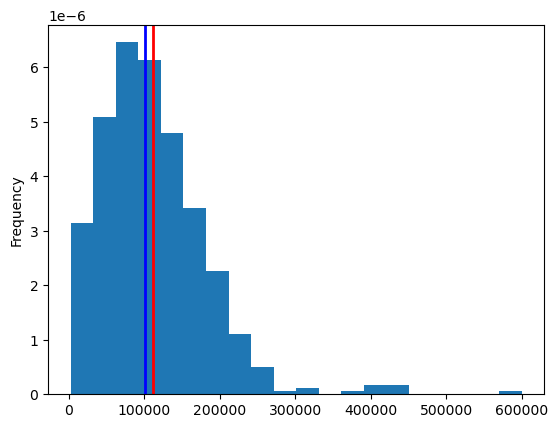

In [ ]:
#memvisualisasi distribusi salary in usd
df["salary_in_usd"].plot(kind="hist", bins=20, density=True)
plt.axvline(df.salary_in_usd.mean(), color='red', linewidth=2, label='salary (mean)')
plt.axvline(df.salary_in_usd.median(), color='blue', linewidth=2, label='salary (median)')
plt.show()

mean dan median memiliki nilai yang berdekatan

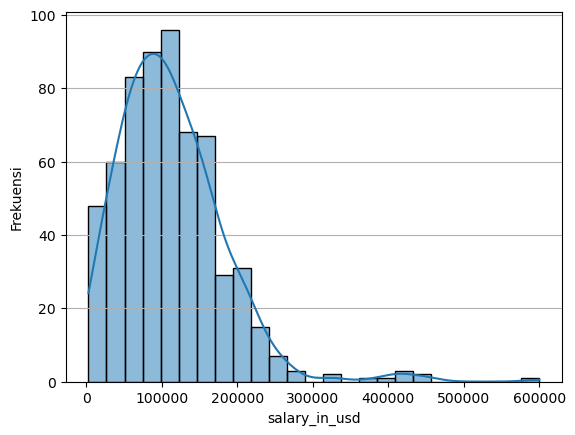

In [ ]:
#buat visualisasi dengan sns
fig, ax = plt.subplots()
sns.histplot(df.salary_in_usd, bins=25, kde=True)
ax.set_ylabel('Frekuensi')
ax.grid(axis='y')

distribusi data tidak normal karena terlalu miring ke kanan

In [ ]:
#mencari outlier dengan metode iqr * 3 karena data memiliki kemiringan yang ekstrim
Q1 = df["salary_in_usd"].quantile(0.25)
Q3 = df["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 3 * IQR
upperBound = Q3 + 3 * IQR

In [ ]:
#melihat outlier
outliers1 = df[(df["salary_in_usd"] < lowerBound) | (df["salary_in_usd"] > upperBound)]
outliers1

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,33,2020,Mid Level,FT,Research Scientist,450000,USD,450000,US,0,US,Mid Sized Company
63,63,2020,Senior,FT,Data Scientist,412000,USD,412000,US,100,US,Large Company
97,97,2021,Mid Level,FT,Financial Data Analyst,450000,USD,450000,US,100,US,Large Company
157,157,2021,Mid Level,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,Large Company
225,225,2021,Expert,CT,Principal Data Scientist,416000,USD,416000,US,100,US,Small Sized Company
252,252,2021,Expert,FT,Principal Data Engineer,600000,USD,600000,US,100,US,Large Company


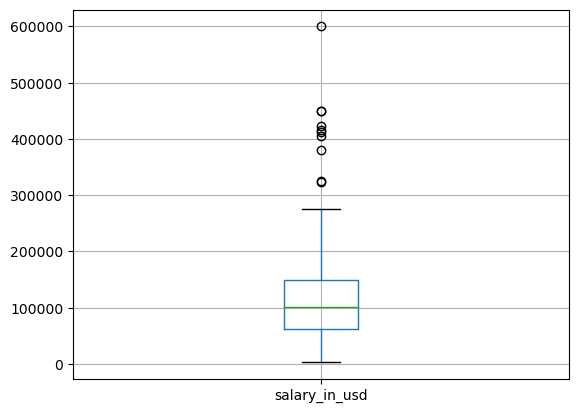

In [ ]:
#memvisualisasi outlier
df.boxplot(column="salary_in_usd")
plt.show()

Dari boxplot terlihat bahwa data memiliki beberapa outlier

data tahun 2021 kita mengetahui bahwa avg salary adalah2 92585. dan di sample tahun 2022 avg salary tembus 125000? apakah itu benar?saya menentukan H0 = 130000
hipothesis:  
H0: μ ==130000  
H1: μ != 130000

In [ ]:
#membuat variabel tahun 2022
df22 = df[df["work_year"] == 2022]
df22

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
289,289,2022,Senior,FT,Data Engineer,135000,USD,135000,US,100,US,Mid Sized Company
290,290,2022,Senior,FT,Data Analyst,155000,USD,155000,US,100,US,Mid Sized Company
291,291,2022,Senior,FT,Data Analyst,120600,USD,120600,US,100,US,Mid Sized Company
292,292,2022,Mid Level,FT,Data Scientist,130000,USD,130000,US,0,US,Mid Sized Company
293,293,2022,Mid Level,FT,Data Scientist,90000,USD,90000,US,0,US,Mid Sized Company
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,Data Engineer,154000,USD,154000,US,100,US,Mid Sized Company
603,603,2022,Senior,FT,Data Engineer,126000,USD,126000,US,100,US,Mid Sized Company
604,604,2022,Senior,FT,Data Analyst,129000,USD,129000,US,0,US,Mid Sized Company
605,605,2022,Senior,FT,Data Analyst,150000,USD,150000,US,100,US,Mid Sized Company


In [ ]:
#menghitung pvalue dengan tstest
tStat,pVal = stats.ttest_1samp(df22.salary_in_usd,130000)
print('P-value:',pVal/2) 
print('t-statistics:',tStat)

P-value: 0.047074942935700394
t-statistics: -1.678936014698419


In [ ]:
#membuat sample data yang dimasukan nilainya secara random
population= np.random.normal(df22.salary_in_usd.mean(), df22.salary_in_usd.std(), 10000)

ci = stats.norm.interval(0.95, df22.salary_in_usd.mean(), df22.salary_in_usd.std())

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


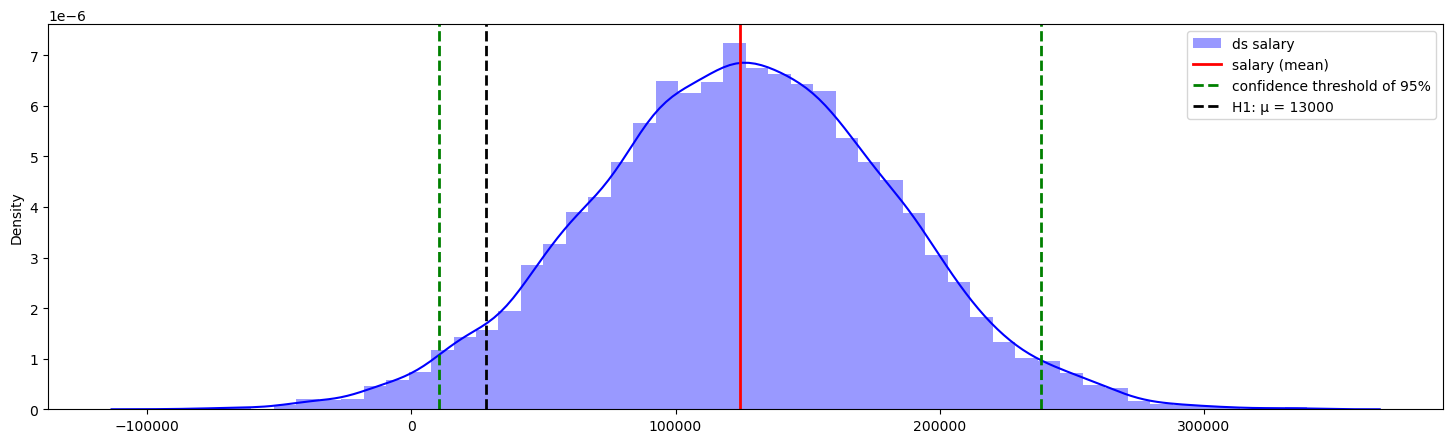

In [ ]:
plt.figure(figsize=(18,5))
sns.distplot(population, label='ds salary', color='blue')
plt.axvline(df22.salary_in_usd.mean(), color='red', linewidth=2, label='salary (mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, )
plt.axvline(population.mean() + tStat*population.std(), color='black', linestyle='dashed', linewidth=2, label = "H1: μ = 13000")
plt.legend()

karena p-value kurang dari 0.05 maka saya menolak H0 dan menyimpulkan bahwa avg salary ds ada di sekitar 130.000

Membuat prediksi gaji ds di tahun 2023

In [ ]:
#mengroupkan data dan merata-ratakan salary in usd berdasarkan tahun
dc2 = df.groupby("work_year").agg({"salary_in_usd": 'mean'}).reset_index()
dc2

,work_year,salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


In [ ]:
#menambahkan kolom baru untuk sebagai nilai x
dc2["nilai_Index"]=range(len(dc2))
dc2

,work_year,salary_in_usd,nilai_Index
0,2020,95813.000000,0
1,2021,99853.792627,1
2,2022,124522.006289,2


In [ ]:
#membuat sumbu y
sumbuY=dc2["salary_in_usd"]
sumbuY

0     95813.000000
1     99853.792627
2    124522.006289
Name: salary_in_usd, dtype: float64

In [ ]:
#merubah sumbu y menjadi array
yVal=dc2["salary_in_usd"].values

In [ ]:
#menurunkan nilay yVal
yDiff=np.diff(yVal)
yDiff

array([ 4040.79262673, 24668.21366258])

In [ ]:
#membuat dataframe berixi x dan y
dfDiff=pd.DataFrame({"x":dc2["nilai_Index"][:-1],"y":yDiff})
dfDiff

,x,y
0,0,4040.792627
1,1,24668.213663


In [ ]:
#menghitung prediksi dengan rumus menggunakan v=delta w/delta t
v=(124522.006289-99853.792627)/(1-0)
prediksi=124522.006289+v*1
prediksi

149190.219951

In [ ]:
#menghitung prediksi menggunakan rumus v=turunan pertama pada baris terakhir
prediksi2=124522.006289+24668.213663*1
prediksi2

149190.21995199998

Menurut prediksi,rata-rata gaji ds di tahun 2023 adalah 149190

# Kesimpulan

Menurut kesimpulan saya pekerjaan dalam ruang lingkup data science sekarang sangatlah menjanjikan, karena ruang lingkupnya sangatlah luas, dan memiliki level karir yang tinggi. 

# Link Tableau

https://public.tableau.com/shared/968W75QTZ?:display_count=n&:origin=viz_share_link